Some insights from the starter notebook
- Use only features with high correlation
- RMSE is subject to outliers
- In dwelling types [ 0 and 1] have different trends with the left hand side being chaotic for most dwelling graphs. What does this mean?
- Should I merge train and test data???
- Check for feature importance [ psa00,pw00, car01, car00, lan10]
- How can i combine columns or come up with new ones. Classify wards as urban or rural using coordinates.
- Check on model overfitting using train vs test error, Plotting validation curve for the model
- Cross validation with no shuffling
- Create a score-model function esp when doing hyp.tuning
- More complex models


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os, random, math, glob
from IPython.display import Image as IM
from IPython.display import clear_output
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]

## Load Data

In [2]:
df = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ID = test['ward']
y = df.target
df.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


In [3]:
y.shape

(2822,)

In [4]:
test.head()

,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,21001001: Ward 1,2504.95194,8745.15151,0.947257,0.000873,0.002021,0.000000,0.000000,0.030116,0.000452,...,0.001757,0.000000,0.0,0.006649,0.0,0.0,ZA2101001,-32.637758,23.848688,0.000000
1,21001002: Ward 2,2080.27718,7258.11764,0.844993,0.000481,0.043629,0.004714,0.012323,0.012300,0.022132,...,0.000691,0.000000,0.0,0.002916,0.0,0.0,ZA2101002,-31.990536,24.555818,0.000000
2,21001003: Ward 3,1106.62639,5919.13170,0.651380,0.007937,0.007113,0.000000,0.001977,0.259711,0.006505,...,0.002253,0.000000,0.0,0.000000,0.0,0.0,ZA2101003,-32.283595,24.563940,8.269556
3,21001004: Ward 4,2175.56096,10280.57452,0.410837,0.002468,0.011511,0.000485,0.000000,0.449604,0.009256,...,0.000000,0.000661,0.0,0.001379,0.0,0.0,ZA2101004,-32.261612,24.542202,8.626625
4,21001005: Ward 5,1270.83883,6018.34202,0.942851,0.002638,0.000821,0.000000,0.000891,0.000787,0.000830,...,0.000000,0.000000,0.0,0.001660,0.0,0.0,ZA2101005,-32.251571,24.558537,8.601754


## Information on the data

In [5]:
df.shape

(2822, 63)

In [6]:
test.shape

(1013, 62)

## EDA

In [7]:
data = pd.concat([df, test], axis=0).reset_index(drop=True)
data.shape


(3835, 63)

Missing Values

<AxesSubplot:>

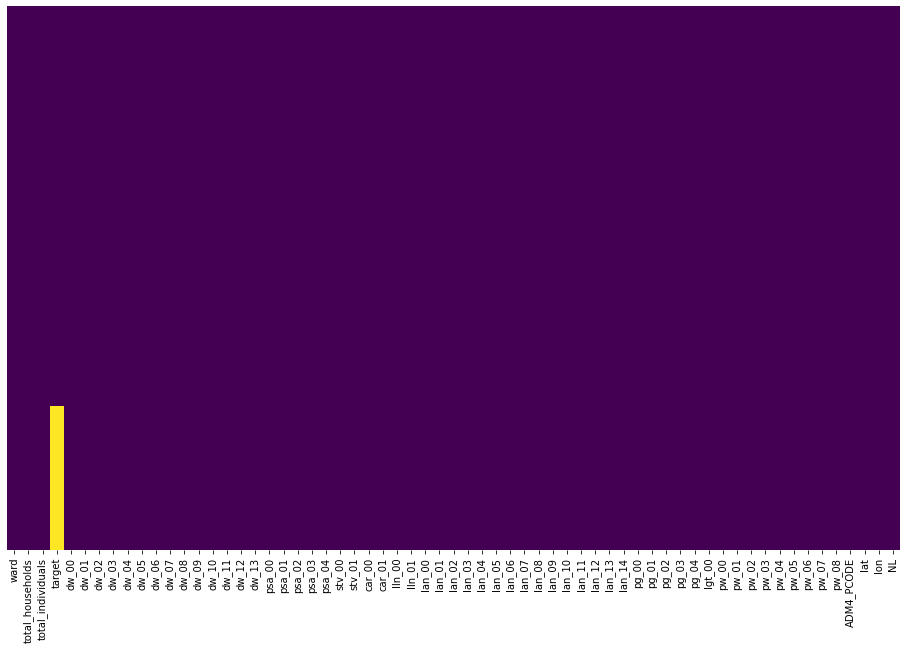

In [8]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')


Phew!!! No Missing Data

In [9]:
# Statistical Summary
data.describe()

,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,lat,lon,NL
count,3835.000000,3835.000000,2822.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,...,3835.000000,3835.000000,3835.000000,3835.000000,3835.000000,3835.0,3835.0,3835.000000,3835.000000,3835.000000
mean,3523.034239,12552.886065,24.507554,0.665409,0.133501,0.036257,0.005542,0.007795,0.011874,0.023818,...,0.133695,0.043760,0.019246,0.010942,0.134153,0.0,0.0,-28.415347,27.635497,16.438122
std,3150.715522,9569.423219,10.294387,0.246614,0.238090,0.080782,0.017389,0.027560,0.042511,0.038561,...,0.164251,0.060791,0.032062,0.023029,0.228252,0.0,0.0,3.155866,3.434569,18.951210
min,1.000000,359.881550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-34.670197,16.760022,0.000000
25%,1735.446115,6911.898170,16.751556,0.520389,0.002970,0.002847,0.000000,0.000000,0.000000,0.003340,...,0.007883,0.001943,0.000683,0.000141,0.005049,0.0,0.0,-30.858571,26.619325,2.001946
50%,2281.103690,9022.354340,24.156670,0.732733,0.011090,0.008556,0.000859,0.000653,0.001051,0.009716,...,0.068147,0.015811,0.004870,0.001392,0.023655,0.0,0.0,-27.969031,28.318736,7.815497
75%,3774.160880,13602.342065,32.226553,0.862848,0.118624,0.035710,0.002610,0.002359,0.004420,0.026695,...,0.198175,0.062783,0.024944,0.009898,0.136971,0.0,0.0,-25.964556,30.081648,25.410298
max,39684.942130,91716.746370,55.528423,0.994962,0.985465,0.951806,0.264239,0.392085,0.742617,0.418048,...,1.000000,0.389603,0.306787,0.228261,0.993841,0.0,0.0,-22.331267,32.858249,63.000000


Normalizing The Data

In [11]:
data['Household_Size'] = data['total_individuals']/data['total_households']
# test['Household_Size'] = test['total_individuals']/test['total_households']
data['Household_Size'].head()

0    3.516501
1    3.877587
2    3.025929
3    3.294194
4    3.846971
Name: Household_Size, dtype: float64

Clustering latitude and longitude points

In [54]:
keep = ['psa_00','car_01','stv_01','lln_01','pg_00','pw_06','dw_01','pw_00', 'psa_01', 'car_00', 'stv_00', 'lln_00',  'pg_03', 'lat', 'lon', 'lan_00', 'lan_01', 'dw_04']
X = data[keep].values
print(X)

[[2.60191138e-01 7.26272745e-01 7.16532422e-01 ... 8.32912639e-01
  1.23364623e-02 0.00000000e+00]
 [2.90228326e-01 8.55361788e-01 8.96358827e-01 ... 8.79654892e-01
  8.44515730e-03 2.30138040e-03]
 [1.86434767e-01 7.27779973e-01 8.34228360e-01 ... 5.65545996e-01
  1.59912060e-02 7.73460490e-03]
 ...
 [2.39656234e-01 7.04809164e-01 8.12703979e-01 ... 6.97275488e-01
  6.67369230e-02 3.71287201e-04]
 [2.03363573e-01 4.67194096e-01 6.79256565e-01 ... 4.46027211e-01
  5.21741818e-01 9.39132227e-04]
 [2.46843394e-01 6.68682289e-01 7.95669324e-01 ... 4.82533763e-01
  1.01908571e-01 1.67437859e-03]]


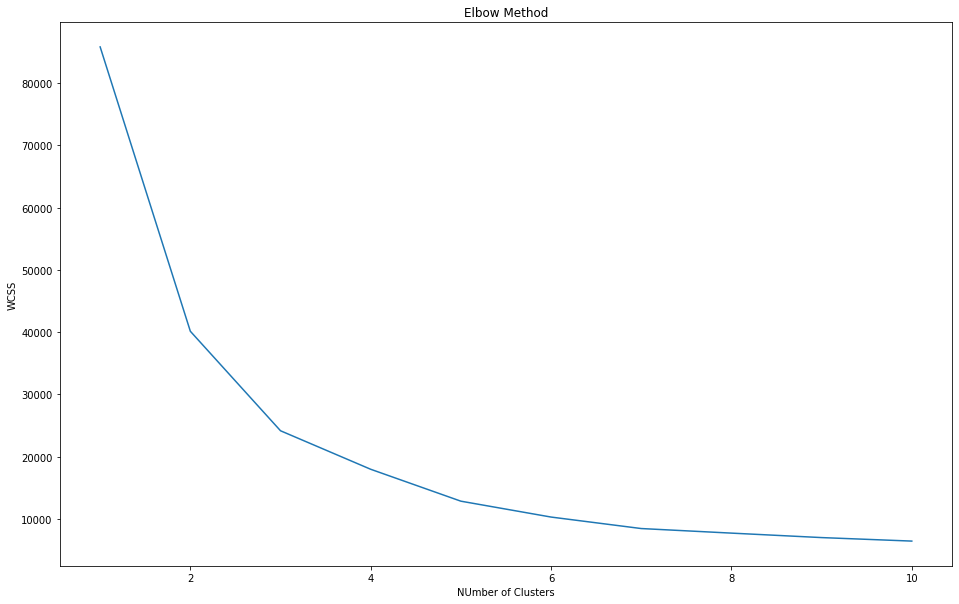

In [55]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('NUmber of Clusters')
plt.ylabel('WCSS')
plt.show()

Best breakpoint is at 5

In [56]:
# Fitting our model to the data selected
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)
len(y_kmeans)


[4 4 4 ... 1 1 1]


3835

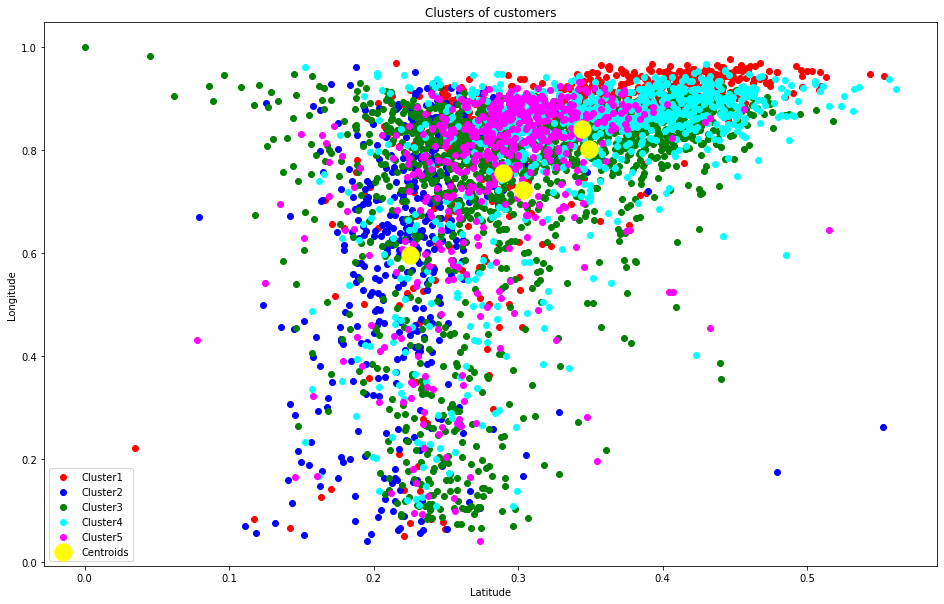

In [57]:
# Visualize the clusters

plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],c='red',label='Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],c='blue',label='Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],c='green',label='Cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],c='cyan',label='Cluster4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],c='magenta',label='Cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()

In [58]:
data['cluster'] = y_kmeans

In [59]:
# cluster1 = pd.DataFrame(X[y_kmeans==0,0],X[y_kmeans==0,1])
# cluster2 = pd.DataFrame(X[y_kmeans==1,0],X[y_kmeans==1,1])
# cluster3 = pd.DataFrame(X[y_kmeans==2,0],X[y_kmeans==2,1])
# cluster4 = pd.DataFrame(X[y_kmeans==3,0],X[y_kmeans==3,1])
# cluster5 = pd.DataFrame(X[y_kmeans==4,0],X[y_kmeans==4,1])
# cluster1.head()

In [60]:
data['with_piped_water'] = data['pw_00'] + data['pw_01'] + data['pw_02'] + data['pw_03'] + data['pw_04'] + data['pw_05']

In [61]:
data['informal_dwelling'] = data['dw_07'] + data['dw_08']

In [62]:
data[['with_piped_water', 'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05', 'target']].corr()

,with_piped_water,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,target
with_piped_water,1.000000,0.518847,0.338243,-0.023383,-0.112951,-0.166493,-0.204042,-0.470676
pw_00,0.518847,1.000000,-0.270504,-0.549158,-0.526446,-0.439177,-0.358815,-0.754536
pw_01,0.338243,-0.270504,1.000000,-0.246959,-0.278153,-0.241656,-0.191235,0.113646
pw_02,-0.023383,-0.549158,-0.246959,1.000000,0.738351,0.490863,0.313355,0.442441
pw_03,-0.112951,-0.526446,-0.278153,0.738351,1.000000,0.625032,0.410752,0.440941
pw_04,-0.166493,-0.439177,-0.241656,0.490863,0.625032,1.000000,0.502692,0.389467
pw_05,-0.204042,-0.358815,-0.191235,0.313355,0.410752,0.502692,1.000000,0.349653
target,-0.470676,-0.754536,0.113646,0.442441,0.440941,0.389467,0.349653,1.000000


pw_02 and pw_03 have multi-collinearity

In [63]:
data[['informal_dwelling', 'target']].corr()

,informal_dwelling,target
informal_dwelling,1.000000,-0.216142
target,-0.216142,1.000000


In [64]:
data.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_07,pw_08,ADM4_PCODE,lat,lon,NL,Household_Size,cluster,with_piped_water,informal_dwelling
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.0,0.0,ZA4161001,-29.682270,24.734743,0.292039,3.516501,4,0.987072,0.039546
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.0,0.0,ZA4161002,-29.119311,24.757737,3.207775,3.877587,4,0.995869,0.275457
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.0,0.0,ZA4161003,-29.142276,25.094093,0.000000,3.025929,4,0.959119,0.152534
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.0,0.0,ZA4161004,-29.372052,24.942867,2.038778,3.294194,4,0.994989,0.287695
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.0,0.0,ZA4161005,-29.409381,25.290165,0.000000,3.846971,4,0.982371,0.024532


In [65]:
data.shape

(3835, 67)

### Univariate Feature Selection

In [66]:
cols = data.drop('ADM4_PCODE', axis=1).columns[4:]

table = data[cols]

X = table.iloc[:2822, :]
train_df = pd.concat([X, y], axis = 1)
test_df = table.iloc[2822:, :]

train_df.head()

,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,...,pw_07,pw_08,lat,lon,NL,Household_Size,cluster,with_piped_water,informal_dwelling,target
0,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,...,0.0,0.0,-29.682270,24.734743,0.292039,3.516501,4,0.987072,0.039546,16.773757
1,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,...,0.0,0.0,-29.119311,24.757737,3.207775,3.877587,4,0.995869,0.275457,21.496661
2,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,...,0.0,0.0,-29.142276,25.094093,0.000000,3.025929,4,0.959119,0.152534,10.931425
3,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,...,0.0,0.0,-29.372052,24.942867,2.038778,3.294194,4,0.994989,0.287695,23.119257
4,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,...,0.0,0.0,-29.409381,25.290165,0.000000,3.846971,4,0.982371,0.024532,13.652252


In [67]:
test_df.head()

,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,...,pw_06,pw_07,pw_08,lat,lon,NL,Household_Size,cluster,with_piped_water,informal_dwelling
2822,0.947257,0.000873,0.002021,0.000000,0.000000,0.030116,0.000452,0.013018,0.003516,0.000000,...,0.006649,0.0,0.0,-32.637758,23.848688,0.000000,3.491145,0,0.993351,0.016534
2823,0.844993,0.000481,0.043629,0.004714,0.012323,0.012300,0.022132,0.022412,0.016969,0.006702,...,0.002916,0.0,0.0,-31.990536,24.555818,0.000000,3.489015,0,0.997084,0.039381
2824,0.651380,0.007937,0.007113,0.000000,0.001977,0.259711,0.006505,0.044153,0.013530,0.000000,...,0.000000,0.0,0.0,-32.283595,24.563940,8.269556,5.348808,0,1.000000,0.057682
2825,0.410837,0.002468,0.011511,0.000485,0.000000,0.449604,0.009256,0.101963,0.001516,0.009203,...,0.001379,0.0,0.0,-32.261612,24.542202,8.626625,4.725482,0,0.998621,0.103479
2826,0.942851,0.002638,0.000821,0.000000,0.000891,0.000787,0.000830,0.027930,0.001617,0.017343,...,0.001660,0.0,0.0,-32.251571,24.558537,8.601754,4.735724,0,0.998340,0.029547


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Using SelectKBest with f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

def select_features(X_train, y_train, X_test):
    sf = SelectKBest(score_func=f_regression, k=50)
    sf.fit(X_train, y_train)
    X_train_sf = sf.transform(X_train)
    X_test_sf = sf.transform(X_test)

    return X_train_sf, X_test_sf, sf

#select features
X_train_sf, X_test_sf, sf = select_features(X_train, y_train, X_test)


C:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


### Model Development


Scoring with cross validation

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from math import sqrt
model = RandomForestRegressor(n_estimators=100)

cv_results = cross_validate(model, X_train_sf, y_train, scoring='neg_root_mean_squared_error', cv=5, return_train_score=True, error_score='raise')
cv_results = pd.DataFrame(cv_results)
scores = pd.DataFrame()
scores[['train_error','test_error']] = -cv_results[['train_score','test_score']]
scores['test_error'].mean()

3.6335890931140016

In [76]:
data[['cluster', 'target']].corr()

,cluster,target
cluster,1.000000,0.060588
target,0.060588,1.000000


In [73]:
data.cluster.value_counts()

2    1426
3     835
0     602
4     536
1     436
Name: cluster, dtype: int64

In [78]:
import xgboost
from sklearn.model_selection import cross_validate
from math import sqrt
model = xgboost.XGBRegressor()

cv_results = cross_validate(model, X, y, scoring='neg_root_mean_squared_error', cv=5, return_train_score=True, error_score='raise')
cv_results = pd.DataFrame(cv_results)
scores = pd.DataFrame()
scores[['train_error','test_error']] = -cv_results[['train_score','test_score']]
scores['test_error'].mean()

4.090963699954483

In [79]:
import lightgbm 
from sklearn.model_selection import cross_validate
from math import sqrt
lgbm = lightgbm.LGBMRegressor()

cv_results = cross_validate(model, X_train_sf, y_train, scoring='neg_root_mean_squared_error', cv=5, return_train_score=True, error_score='raise')
cv_results = pd.DataFrame(cv_results)
scores = pd.DataFrame()
scores[['train_error','test_error']] = -cv_results[['train_score','test_score']]
scores['test_error'].mean()

3.71218618874936

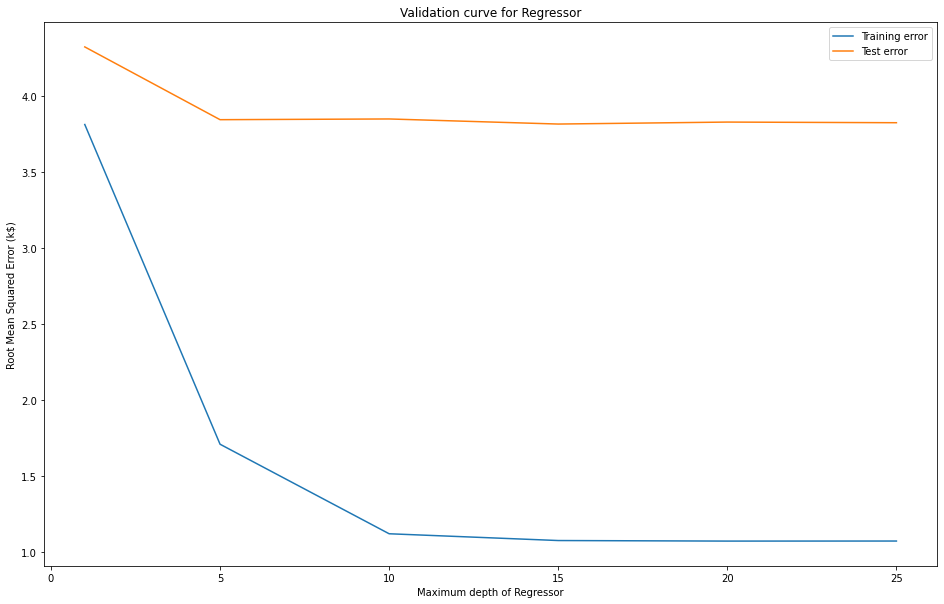

In [80]:
# Plot a validation curve to check overfitting

from sklearn.model_selection import validation_curve

max_depth = [1, 5, 10, 15, 20, 25]
train_scores, test_scores = validation_curve(
    lgbm, X, y, param_name="max_depth", param_range=max_depth,
    cv=5, scoring="neg_root_mean_squared_error", n_jobs=2)
train_errors, test_errors = -train_scores, -test_scores

plt.plot(max_depth, train_errors.mean(axis=1), label='Training error')
plt.plot(max_depth, test_errors.mean(axis=1), label='Test error')
plt.legend()

plt.xlabel("Maximum depth of Regressor")
plt.ylabel("Root Mean Squared Error (k$)")
_ = plt.title("Validation curve for Regressor")

Suitable max_depth seems [5]

Hyperparameter Tuning

In [86]:
# Hyperparameter Tuning

boosting_type = ['gbdt']
num_leaves = [20, 50, 70, 120, 150, 200, 250, 300]
min_child_samples = [10, 20, 40, 50, 70, 100]
max_depth = [3, 5, 7, 10, 15]
n_estimators = [1, 2, 5, 10, 20, 50, 100, 200, 500]
learning_rate = [0.03, 0.05, 0.09, 0.1, 0.2]

param_grid = {
    'boosting_type' : boosting_type,
    'num_leaves' : num_leaves,
    'min_child_samples' : min_child_samples,
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'learning_rate' : learning_rate,
}

from sklearn.model_selection import RandomizedSearchCV

random_cv = RandomizedSearchCV(estimator=lightgbm.LGBMRegressor(), param_distributions=param_grid, scoring= 'neg_root_mean_squared_error',
                           n_iter =10, n_jobs=-1, cv=5,
                           verbose=5, random_state = 0, return_train_score=True, error_score='raise')

random_cv.fit(X_train_sf, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, error_score='raise', estimator=LGBMRegressor(),
                   n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt'],
                                        'learning_rate': [0.03, 0.05, 0.09, 0.1,
                                                          0.2],
                                        'max_depth': [3, 5, 7, 10, 15],
                                        'min_child_samples': [10, 20, 40, 50,
                                                              70, 100],
                                        'n_estimators': [1, 2, 5, 10, 20, 50,
                                                         100, 200, 500],
                                        'num_leaves': [20, 50, 70, 120, 150,
                                                       200, 250, 300]},
                   random_state=0, return_train_score=True,
                   scoring='neg_root_mean_squared_error', verbose=5)

In [87]:
columns = [f"param_{name}" for name in param_grid.keys()]
columns += ["mean_test_error", "std_test_error"]
cv_results = pd.DataFrame(random_cv.cv_results_)
cv_results["mean_test_error"] = -cv_results["mean_test_score"]
cv_results["std_test_error"] = cv_results["std_test_score"]
cv_results[columns].sort_values(by="mean_test_error")

,param_boosting_type,param_num_leaves,param_min_child_samples,param_n_estimators,param_max_depth,param_learning_rate,mean_test_error,std_test_error
0,gbdt,150,20,500,5,0.05,3.397979,0.145656
2,gbdt,200,70,100,7,0.2,3.545308,0.127319
6,gbdt,120,20,50,10,0.1,3.546510,0.094350
8,gbdt,70,50,50,10,0.09,3.552009,0.148234
1,gbdt,300,100,500,15,0.2,3.584563,0.144972
7,gbdt,200,10,100,3,0.09,3.632594,0.138884
9,gbdt,20,50,100,3,0.1,3.669016,0.182833
4,gbdt,120,20,20,5,0.09,4.122899,0.155379
3,gbdt,20,50,10,7,0.05,7.129899,0.260411
5,gbdt,50,40,2,5,0.2,7.447170,0.256056


In [88]:
random_cv.best_estimator_

LGBMRegressor(learning_rate=0.05, max_depth=5, n_estimators=500, num_leaves=150)

In [89]:
random_cv.best_score_

-3.397978989057087

In [90]:
error = -random_cv.score(X_test_sf, y_test)
print(f"On average, our model makes an error of {error:.2f}.")

On average, our model makes an error of 3.16.


In [ ]:
# y_pred = random_cv.predict(X_test_sf)


In [ ]:
# model = lightgbm.LGBMRegressor(num_iterations=250, learning_rate=0.03, max_depth=15, metric='rmse', boosting_type = 'gbdt', min_data=50, num_leaves=70)
# model.fit(X, y)

In [97]:
X_test_sf = pd.DataFrame(X_test_sf)
X_test_sf.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.312948,0.079501,0.001186,0.000000,0.001378,0.006144,0.019733,0.050356,0.006751,0.002893,...,0.027203,0.019997,0.001985,0.062959,-30.118707,29.282388,0.000000,3.0,0.937041,0.070088
1,0.046439,0.009159,0.002819,0.000000,0.011571,0.005189,0.038423,0.146289,0.012511,0.005032,...,0.041328,0.029294,0.016458,0.146579,-26.078382,25.839042,15.773764,4.0,0.853421,0.184712
2,0.091124,0.002353,0.003708,0.001636,0.011389,0.010406,0.049961,0.107305,0.001148,0.000193,...,0.022518,0.024142,0.003813,0.079092,-29.970421,30.840556,35.747076,3.0,0.920908,0.157266
3,0.008494,0.002448,0.001656,0.005862,0.000348,0.043820,0.014529,0.009106,0.001417,0.000594,...,0.001430,0.000598,0.000611,0.012393,-29.730505,30.978227,54.992047,3.0,0.987607,0.023635
4,0.801225,0.009654,0.000000,0.000403,0.000000,0.007691,0.004253,0.003096,0.000709,0.000000,...,0.078985,0.040369,0.014663,0.406589,-30.311653,30.308249,3.922369,3.0,0.593411,0.007349


In [94]:
X.head()

,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,...,pw_06,pw_07,pw_08,lat,lon,NL,Household_Size,cluster,with_piped_water,informal_dwelling
0,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,0.008080,0.002823,...,0.012928,0.0,0.0,-29.682270,24.734743,0.292039,3.516501,4,0.987072,0.039546
1,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,0.151910,0.001486,...,0.004131,0.0,0.0,-29.119311,24.757737,3.207775,3.877587,4,0.995869,0.275457
2,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,0.129902,0.000000,...,0.040881,0.0,0.0,-29.142276,25.094093,0.000000,3.025929,4,0.959119,0.152534
3,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,0.218786,0.000000,...,0.005011,0.0,0.0,-29.372052,24.942867,2.038778,3.294194,4,0.994989,0.287695
4,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,0.015382,0.008693,...,0.017629,0.0,0.0,-29.409381,25.290165,0.000000,3.846971,4,0.982371,0.024532


In [92]:
sf = SelectKBest(score_func=f_regression, k=50)
X_train = sf.fit_transform(X, y)
# X_train = sf.transform(X_train)
X_test = sf.transform(test_df)

C:\Users\HP\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


In [98]:
random_cv.fit(X_train, y)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, error_score='raise', estimator=LGBMRegressor(),
                   n_jobs=-1,
                   param_distributions={'boosting_type': ['gbdt'],
                                        'learning_rate': [0.03, 0.05, 0.09, 0.1,
                                                          0.2],
                                        'max_depth': [3, 5, 7, 10, 15],
                                        'min_child_samples': [10, 20, 40, 50,
                                                              70, 100],
                                        'n_estimators': [1, 2, 5, 10, 20, 50,
                                                         100, 200, 500],
                                        'num_leaves': [20, 50, 70, 120, 150,
                                                       200, 250, 300]},
                   random_state=0, return_train_score=True,
                   scoring='neg_root_mean_squared_error', verbose=5)

In [99]:
test['target'] = random_cv.predict(X_test)
test.head()

,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,...,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL,target
0,21001001: Ward 1,2504.95194,8745.15151,0.947257,0.000873,0.002021,0.000000,0.000000,0.030116,0.000452,...,0.000000,0.0,0.006649,0.0,0.0,ZA2101001,-32.637758,23.848688,0.000000,17.971817
1,21001002: Ward 2,2080.27718,7258.11764,0.844993,0.000481,0.043629,0.004714,0.012323,0.012300,0.022132,...,0.000000,0.0,0.002916,0.0,0.0,ZA2101002,-31.990536,24.555818,0.000000,12.637459
2,21001003: Ward 3,1106.62639,5919.13170,0.651380,0.007937,0.007113,0.000000,0.001977,0.259711,0.006505,...,0.000000,0.0,0.000000,0.0,0.0,ZA2101003,-32.283595,24.563940,8.269556,20.334962
3,21001004: Ward 4,2175.56096,10280.57452,0.410837,0.002468,0.011511,0.000485,0.000000,0.449604,0.009256,...,0.000661,0.0,0.001379,0.0,0.0,ZA2101004,-32.261612,24.542202,8.626625,16.529600
4,21001005: Ward 5,1270.83883,6018.34202,0.942851,0.002638,0.000821,0.000000,0.000891,0.000787,0.000830,...,0.000000,0.0,0.001660,0.0,0.0,ZA2101005,-32.251571,24.558537,8.601754,21.049862


In [102]:
# Save
test[['ward', 'target']].to_csv('submission4.csv', index=False)